### Seaborn Tutorial

**Seaborn** [Seaborn official web](https://seaborn.pydata.org/) is just use to plot some statiscis plot such as `hist`, `count`, `joint plot` etc. plot curve. The reason we want to plot the statiscis graph to find more inherent logic in the data, this is the feature engineering first step to find out what data we have and what data we could process. 

You have known the **matplotlib** module, that's also a plot module, you know what? **seaborn** is based on **matplotlib**. so you know that how powerful **matplotlib**! As you have some basic idea about how to plot graph with **matplotlib**, so here I just make another tutorial for you to know better about **seaborn** module. In fact, there is really great tutorail in the web of **seaborn** official web, I really recommend if you finished the most common part, then you should go surf with this web: [seaborn tutorial](https://seaborn.pydata.org/tutorial.html).

Final words, **seaborn** is really power, I use this many times if I do machine learning project!

#### Important thing!
I really recommend that you should update the seaborn to the latest version first! Just use this command: `pip installl --upgrade seaborn` in the Terminal, not go into with `ipython`!

In [1]:
# import some useful module
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris

# you could even set what style plot you want
sns.set(style="darkgrid")

warnings.simplefilter('ignore')

In [25]:
# just make a lambda function to reprensent plt.show(), so that I don't need to write too many plt.show
p = lambda :plt.show()

In [2]:
# here I just use the most used dataset: iris
iris = load_iris()
x, y = iris.data, iris.target

# Here I just make the data to be one DataFrame, as you will use pandas to load data into a DataFrame whole the time
# we first should make data and label with one ndarray
data = np.concatenate((x, y[:, np.newaxis]), axis=1)     # combine label
print("new data shape:", data.shape)

column_names = ['f1', 'f2', 'f3', 'f4']+ ['label']

df = pd.DataFrame(data, columns=column_names)

new data shape: (150, 5)


In [28]:
# here I just add one more feature to represent the sex of the flower, doesn't make sense, but just to show you the plot logic 
import random

sex_list = [random.choice(["female", "male"]) for _ in range(len(df))]
sex_df = pd.DataFrame(sex_list, columns=['sex'])

# combine with sex dataframe with main dataframe
df = pd.concat([df, sex_df], axis=1)

# here you see that I just add one column with sex
df.head()

,f1,f2,f3,f4,label,sex
0,5.1,3.5,1.4,0.2,0,female
1,4.9,3.0,1.4,0.2,0,female
2,4.7,3.2,1.3,0.2,0,male
3,4.6,3.1,1.5,0.2,0,male
4,5.0,3.6,1.4,0.2,0,male


In [6]:
# get the version of seaborn, you should have same version as me
sns.__version__

'0.9.0'

In [3]:
# what data we have?
df.head()

,f1,f2,f3,f4,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# what data types we get?
df.dtypes

f1       float64
f2       float64
f3       float64
f4       float64
label    float64
dtype: object

In [14]:
# I don't want the label to be float data type, I just it to be a category type, just change it
df['label'] = df['label'].astype('int')

In [15]:
# check the data type again
df.dtypes

f1       float64
f2       float64
f3       float64
f4       float64
label      int32
dtype: object

In [16]:
# check the label changed
df.head()

,f1,f2,f3,f4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### distplot

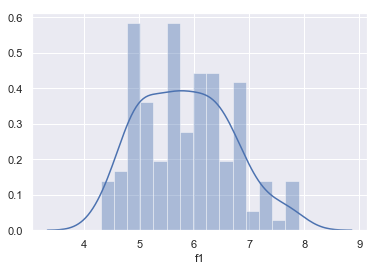

In [39]:
# first plot the just to get the distribution of some features
# here I just use first features
# we use this most times!!!!
# we could change the histgram with change parameter: `bins`, you could just change this parameter to check what changed!
sns.distplot(df['f1'], bins=15)

# without any configuration, that you show that the feature is more like to be a normal distribution
plt.show()

One thing to remember that with different `bins`, we could get differnet histgram plot, so we should carefully to change how many `bins` that we want to use!

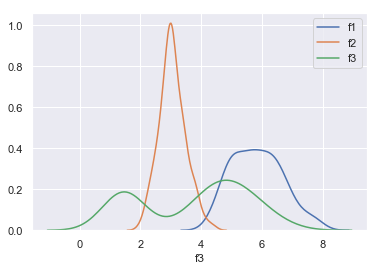

In [37]:
# in fact, we could plot many distribution in one plot, but without histgram plot, just with density curve(that line)
sns.distplot(df['f1'], hist=False, label='f1')
sns.distplot(df['f2'], hist=False, label='f2')
sns.distplot(df['f3'], hist=False, label='f3')

plt.legend()

# we could see different distribution, right?
p()

#### relplot

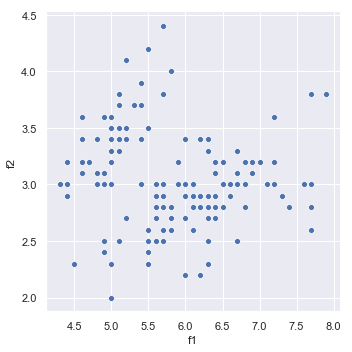

In [8]:
# we could even plot the scatter plot with two features, that's means we want to find the features combine info
# so easy, right? you could just plot without any configuration!
# The main goal is just to plot the curve and get the insight of data will be just fine!
sns.relplot(x='f1', y='f2', data=df)

plt.show()

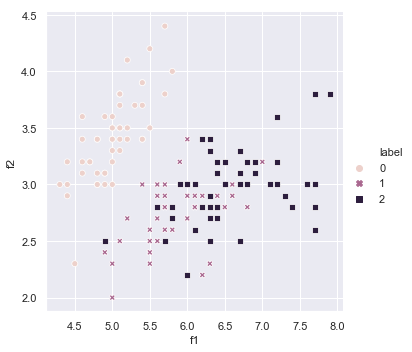

In [20]:
# we could even plot the data with seaborn with different classes, with just changing one parameter
# as you can see that if you want different classes with different color, easy right?
# with added the style, then different classes with different style, realy powerful!
sns.relplot(x='f1', y='f2', hue='label', style='label', data=df)

plt.show()

#### jointplot

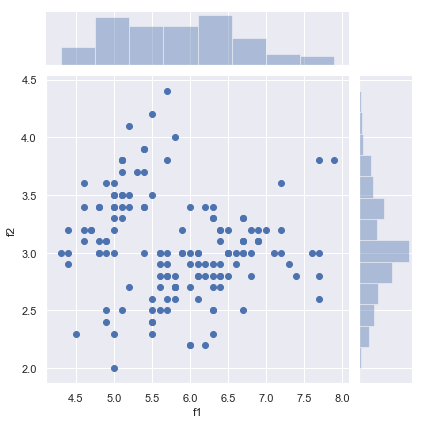

In [23]:
# you could also joint plot two features with each distribution 
sns.jointplot(x='f1', y='f2', data=df)

# the difference is added with two features distribution
plt.show()

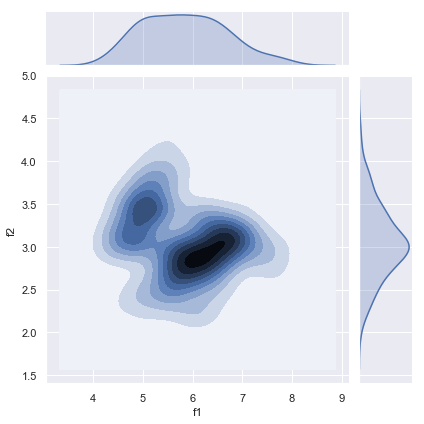

In [40]:
# we could even just the density plot without the scatter in the plot
sns.jointplot(x='f1', y='f2', kind='kde', data=df)

# more dark means more possible to get the features!
p()

#### catplot

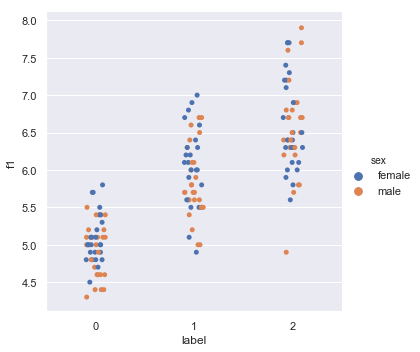

In [30]:
# the most time we want to find is according to label or category features to find the other features' relationship with each other
# as you want to get different classes' data density
sns.catplot(x='label', y='f1',  data=df)

# as you can see that for the label 0, the features 1 is really smaller, and for label 2, the features is larger than others
# you could just change with other features to find the relationship with label!
plt.show()

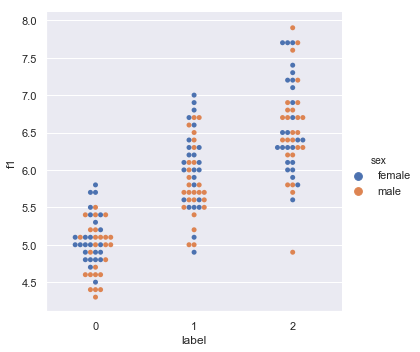

In [31]:
# we could even plot different distribution with just change one parameter
# we could even with different sex, to get the distribution
sns.catplot(x='label', y='f1', kind='swarm', hue='sex', data=df)

# with different kind and different sex, right?
p()

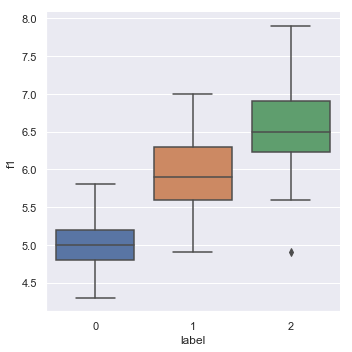

In [27]:
# sometimes we want to find the max, min , medium value, 25%, 75% value with plot, just with change with one parameter
sns.catplot(x='label', y='f1', kind='box', data=df)

# if you don't know this plot means, you could just reach me, I will explain to you! really easy, don't be mad!
p()

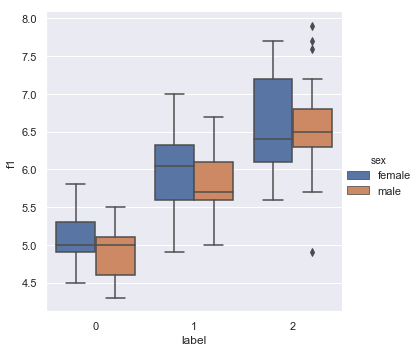

In [29]:
# we could even according to different sex column to get the different box plot
sns.catplot(x='label', y='f1', hue='sex', kind='box', data=df)

# you see that with label 0, we could even get different box with different sex, powerful! right?
p()

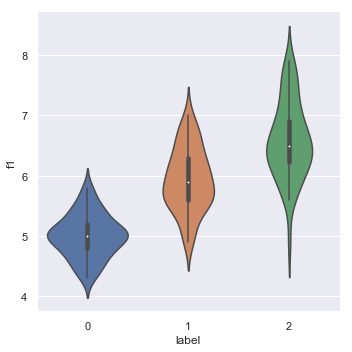

In [32]:
# we could even get different distribution plot with catplot! this is violin plot originally, but this is just to get the distribution according to different label
sns.catplot(x='label', y='f1', kind='violin', data=df)

# with more space means more probability that the feature locates!
# if you don't know what that means, you could just reach me.
p()

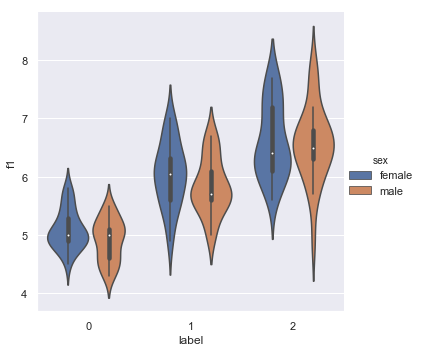

In [33]:
# we could even plot the result with different sex
sns.catplot(x='label', y='f1', kind='violin', hue='sex', data=df)

# you see that with different sex with different distribution
p()

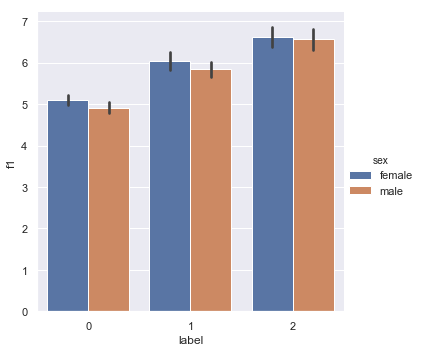

In [35]:
# we could even plot with bar with different numbers with that classes
sns.catplot(x='label', y='f1', kind='bar', hue='sex', data=df)

# with different sex with different numbers(how many!)
p()

#### pairplot

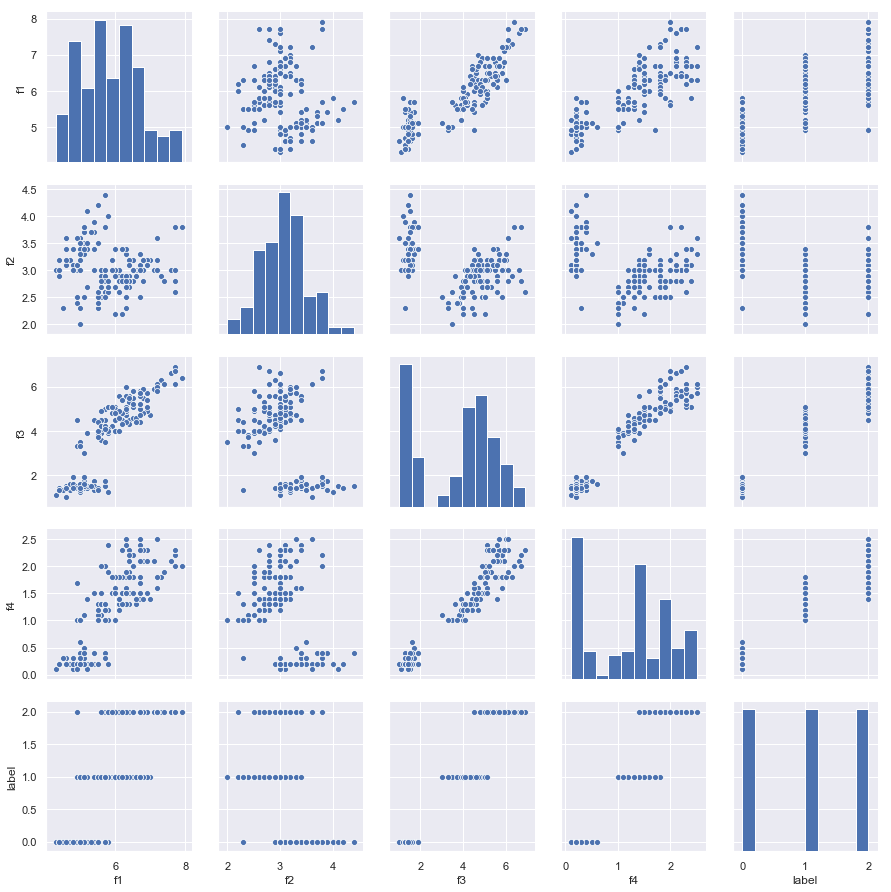

In [42]:
# we could even plot many features in one graph with different joint plot
sns.pairplot(df)

# the diagonal plot is the count plot, the others are just joint plot with different features combine.
p()

### Another point

As we have maily focus on classification problem, in fact, we could even get the plot with regression problem. I will show you with sample dataset.

In [60]:
from sklearn.datasets import load_boston

# data is Boston house price prediction
x, y = load_boston(return_X_y=True)

# make into one ndarray, there are too many features, here I just choose 5 features to show you.
data = np.concatenate((x[:, :5], y[:, np.newaxis]), axis=1)
print("Get data shape: ", data.shape)

column_names = ['f1', 'f2', 'f3', 'f4', 'f5', 'price']

df = pd.DataFrame(data, columns=column_names)

df.head()

Get data shape:  (506, 6)


,f1,f2,f3,f4,f5,price
0,0.00632,18.0,2.31,0.0,0.538,24.0
1,0.02731,0.0,7.07,0.0,0.469,21.6
2,0.02729,0.0,7.07,0.0,0.469,34.7
3,0.03237,0.0,2.18,0.0,0.458,33.4
4,0.06905,0.0,2.18,0.0,0.458,36.2


In [46]:
# first should to get whether there are some null value in the dataframe
# there isn't any null value in the dataframe
df.isnull().sum()

f1       0
f2       0
f3       0
price    0
dtype: int64

In [61]:
# our goal is to predict the price of the house
# in fact, we could even use model to fit the data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(df.iloc[:, :-1], df['price'])

# R2 score is larger is better, the largest is 1, but could be negative!
print('R2 score of the model: %.4f' % lr.score(df.iloc[:, :-1], df['price']))

R2 score of the model: 0.3313


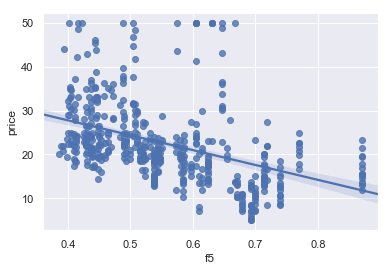

In [62]:
# we could plot one fitted line with first feature and price as label
sns.regplot(x='f5', y='price', data=df)

# you see that the line is the fitted line! x axis is 5th feature and y axis is the price as label
p()

### Final words

As **seaborn** is really powerful! I don't learn the whole things, this is just some really important things that I could show you! In fact you don't need to get the link of official tutorial, that's really comprehensive! You should just get these plot to use in most of your work in the future!

**Happy plotting!**